In [352]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance


In [353]:
data = pd.read_csv("D:\\Resume_and_finshed_projects\\spotify\\spotify_2023.csv", encoding = "ISO-8859-1") 
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [354]:

#Overveiw of the data
print(data.info())
print('====================================================')
print(data.shape)
print('====================================================')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [355]:
data.isnull().sum() 


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [356]:
#Converting keys to numerical values 
key_mapping = {
    'C': 0,
    'C#': 1,
    'D': 2,
    'D#': 3,
    'E': 4,
    'F': 5,
    'F#': 6,
    'G': 7,
    'G#': 8,
    'A': 9,
    'A#': 10,
    'B': 11
}
data['key'] = data['key'].map(key_mapping) 

In [357]:
#Creating a subset with the missing values gone 


data_subset = data.dropna()
data_subset.isnull().sum() 


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [358]:
#Converting modes to numerical values so can be used in machine learning algorythims  

data_subset.loc[:,'mode'] = data_subset['mode'].replace({'Major': 1, 'Minor': 0})  





In [359]:
#making it so its just top 100 

data_100 = data_subset[data_subset['in_spotify_charts'] <= 100]  
data_100 = data_100.drop(columns = ['track_name','artist(s)_name','artist_count','released_year','released_month','released_day','in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts'])

data_100.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 1 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   in_spotify_playlists  814 non-null    int64  
 1   in_spotify_charts     814 non-null    int64  
 2   streams               814 non-null    object 
 3   bpm                   814 non-null    int64  
 4   key                   814 non-null    float64
 5   mode                  814 non-null    object 
 6   danceability_%        814 non-null    int64  
 7   valence_%             814 non-null    int64  
 8   energy_%              814 non-null    int64  
 9   acousticness_%        814 non-null    int64  
 10  instrumentalness_%    814 non-null    int64  
 11  liveness_%            814 non-null    int64  
 12  speechiness_%         814 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 89.0+ KB


In [360]:
data_100.head()

,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
1,1474,48,133716286,92,1.0,1,71,61,74,7,0,10,4
3,7858,100,800840817,170,9.0,1,55,58,72,11,0,11,15
4,3133,50,303236322,144,9.0,0,65,23,80,14,63,11,6
5,2186,91,183706234,141,1.0,1,92,66,58,19,0,8,24
6,3090,50,725980112,148,5.0,0,67,83,76,48,0,8,3


In [361]:
#Splitting up data to be trained to see if there is any trends that makes a song top 100  
target = 'in_spotify_charts'
features = ['bpm', 'key', 'mode']

y = data_100[target]
X = data_100[features]  
#One hot encoding keys


#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)  

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




((569, 3), (245, 3), (569,), (245,))

In [362]:
#Linear regression 
model = LinearRegression()
model.fit(X_train, y_train)  

y_pred = model.predict(X_test) 

#performance evaulation  

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(319.21996134230545, 0.011556026750524806)

In [367]:
mse_list = []
r2_list = []

#Looping Through Key BPm and Mode seperatily
for feature in features:
    
    X_feature = data_100[[feature]] 
    print(feature)
    
 
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.3, random_state=13)
    
    
    model_feature = LinearRegression()
    model_feature.fit(X_train_feature, y_train_feature)
    
   
    y_pred_feature = model_feature.predict(X_test_feature)
    
   
    mse_feature = mean_squared_error(y_test_feature, y_pred_feature)
    r2_feature = r2_score(y_test_feature, y_pred_feature)
    
    # Append results to lists
    mse_list.append(mse_feature)
    r2_list.append(r2_feature)


results = pd.DataFrame({
    'Feature': features,
    'MSE': mse_list,
    'R2 Score': r2_list
})
results


bpm
key
mode


,Feature,MSE,R2 Score
0,bpm,325.428443,-0.007668
1,key,321.123496,0.005662
2,mode,324.821890,-0.005790


Key, BPM and Mode are not great indicators of wether a song will be in top 100 

In [385]:
#Performing linear regression for columns 18-24
features_18_24 = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

X_18_24 = data_100[features_18_24]

X_train_18_24, X_test_18_24, y_train_18_24, y_test_18_24 = train_test_split(X_18_24, y, test_size=0.3, random_state=13)  

model_18_24 = LinearRegression()
model_18_24.fit(X_train_18_24, y_train_18_24) 

y_pred_18_24 = model_18_24.predict(X_test_18_24)

mse_18_24 = mean_squared_error(y_test_18_24, y_pred_18_24)
r2_18_24 = r2_score(y_test_18_24, y_pred_18_24)

mse_18_24, r2_18_24 






(329.5113399033073, -0.020310561642871594)

In [387]:
# Other machine learning algorythms togther
mse_list_dt = []
r2_list_dt = []

mse_list_rf = []
r2_list_rf = []

mse_list_gb = []
r2_list_gb = [] 

mse_list_lin = []
r2_list_lin = [] 


# Loop through each feature from columns 18 to 24
for feature in features:
    # Extract the feature variable
    X_feature = data_100[[feature]]
    
    
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.2, random_state=13)
    
    
    model_dt_feature = DecisionTreeRegressor(random_state=13)
    model_dt_feature.fit(X_train_feature, y_train_feature)
    y_pred_dt_feature = model_dt_feature.predict(X_test_feature)
    mse_dt_feature = mean_squared_error(y_test_feature, y_pred_dt_feature)
    r2_dt_feature = r2_score(y_test_feature, y_pred_dt_feature)
    mse_list_dt.append(mse_dt_feature)
    r2_list_dt.append(r2_dt_feature)
    
    
    model_rf_feature = RandomForestRegressor(random_state=13)
    model_rf_feature.fit(X_train_feature, y_train_feature)
    y_pred_rf_feature = model_rf_feature.predict(X_test_feature)
    mse_rf_feature = mean_squared_error(y_test_feature, y_pred_rf_feature)
    r2_rf_feature = r2_score(y_test_feature, y_pred_rf_feature)
    mse_list_rf.append(mse_rf_feature)
    r2_list_rf.append(r2_rf_feature)
    
    
    model_gb_feature = GradientBoostingRegressor(random_state=13)
    model_gb_feature.fit(X_train_feature, y_train_feature)
    y_pred_gb_feature = model_gb_feature.predict(X_test_feature)
    mse_gb_feature = mean_squared_error(y_test_feature, y_pred_gb_feature)
    r2_gb_feature = r2_score(y_test_feature, y_pred_gb_feature)
    mse_list_gb.append(mse_gb_feature)
    r2_list_gb.append(r2_gb_feature)

    model_lin_feature = LinearRegression() 
    model_lin_feature.fit(X_train_feature, y_train_feature)
    y_pred_lin_feature = model_lin_feature.predict(X_test_feature)
    mse_lin_feature = mean_squared_error(y_test_feature, y_pred_lin_feature) 
    r2_lin_feature = r2_score(y_test_feature, y_pred_lin_feature) 
    mse_list_lin.append(mse_lin_feature) 
    r2_list_lin.append(r2_lin_feature) 
    


results_each_feature = pd.DataFrame({
    'Feature': features,
    'MSE (Decision Tree)': mse_list_dt,
    'R2 Score (Decision Tree)': r2_list_dt,
    'MSE (Random Forest)': mse_list_rf,
    'R2 Score (Random Forest)': r2_list_rf,
    'MSE (Gradient Boosting)': mse_list_gb,
    'R2 Score (Gradient Boosting)': r2_list_gb, 
    'MSE(Linear Regression)': mse_list_lin, 
    'R2 Score(Linear Regression)': r2_list_lin
})
results_each_feature


,Feature,MSE (Decision Tree),R2 Score (Decision Tree),MSE (Random Forest),R2 Score (Random Forest),MSE (Gradient Boosting),R2 Score (Gradient Boosting),MSE(Linear Regression),R2 Score(Linear Regression)
0,bpm,361.354874,-0.215521,348.869152,-0.173522,309.740319,-0.041901,296.892324,0.001317
1,key,292.664748,0.015538,291.818654,0.018384,292.656481,0.015566,290.856240,0.021621
2,mode,295.406305,0.006316,295.473298,0.006090,295.406341,0.006316,295.406305,0.006316


Liveness, speechiness, acousticness and energy have postive r^2 scores. They may be slight indicators of success in top 100

In [379]:
# Other machine learning algorythms togther
mse_list_dt = []
r2_list_dt = []

mse_list_rf = []
r2_list_rf = []

mse_list_gb = []
r2_list_gb = [] 

mse_list_lin = []
r2_list_lin = [] 


# Loop through each feature from columns 18 to 24
for feature in features_18_24:
    # Extract the feature variable
    X_feature = data_100[[feature]]
    
    
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.2, random_state=13)
    
    
    model_dt_feature = DecisionTreeRegressor(random_state=13)
    model_dt_feature.fit(X_train_feature, y_train_feature)
    y_pred_dt_feature = model_dt_feature.predict(X_test_feature)
    mse_dt_feature = mean_squared_error(y_test_feature, y_pred_dt_feature)
    r2_dt_feature = r2_score(y_test_feature, y_pred_dt_feature)
    mse_list_dt.append(mse_dt_feature)
    r2_list_dt.append(r2_dt_feature)
    
    
    model_rf_feature = RandomForestRegressor(random_state=13)
    model_rf_feature.fit(X_train_feature, y_train_feature)
    y_pred_rf_feature = model_rf_feature.predict(X_test_feature)
    mse_rf_feature = mean_squared_error(y_test_feature, y_pred_rf_feature)
    r2_rf_feature = r2_score(y_test_feature, y_pred_rf_feature)
    mse_list_rf.append(mse_rf_feature)
    r2_list_rf.append(r2_rf_feature)
    
    
    model_gb_feature = GradientBoostingRegressor(random_state=13)
    model_gb_feature.fit(X_train_feature, y_train_feature)
    y_pred_gb_feature = model_gb_feature.predict(X_test_feature)
    mse_gb_feature = mean_squared_error(y_test_feature, y_pred_gb_feature)
    r2_gb_feature = r2_score(y_test_feature, y_pred_gb_feature)
    mse_list_gb.append(mse_gb_feature)
    r2_list_gb.append(r2_gb_feature)

    model_lin_feature = LinearRegression() 
    model_lin_feature.fit(X_train_feature, y_train_feature)
    y_pred_lin_feature = model_lin_feature.predict(X_test_feature)
    mse_lin_feature = mean_squared_error(y_test_feature, y_pred_lin_feature) 
    r2_lin_feature = r2_score(y_test_feature, y_pred_lin_feature) 
    mse_list_lin.append(mse_lin_feature) 
    r2_list_lin.append(r2_lin_feature)


results_each_feature = pd.DataFrame({
    'Feature': features_18_24,
    'MSE (Decision Tree)': mse_list_dt,
    'R2 Score (Decision Tree)': r2_list_dt,
    'MSE (Random Forest)': mse_list_rf,
    'R2 Score (Random Forest)': r2_list_rf,
    'MSE (Gradient Boosting)': mse_list_gb,
    'R2 Score (Gradient Boosting)': r2_list_gb, 
    'MSE(Linear Regression)': mse_list_lin, 
    'R2 Score(Linear Regression)': r2_list_lin
})
results_each_feature


,Feature,MSE (Decision Tree),R2 Score (Decision Tree),MSE (Random Forest),R2 Score (Random Forest),MSE (Gradient Boosting),R2 Score (Gradient Boosting),MSE(Linear Regression),R2 Score(Linear Regression)
0,danceability_%,333.264067,-0.121030,333.318391,-0.121212,322.092197,-0.083450,295.019388,0.007617
1,valence_%,375.852508,-0.264288,377.728319,-0.270598,338.747952,-0.139476,298.520958,-0.004161
2,energy_%,324.129788,-0.090304,328.230371,-0.104097,307.752030,-0.035213,294.063420,0.010833
3,acousticness_%,372.856394,-0.254210,342.476068,-0.152017,333.074250,-0.120391,295.684903,0.005379
4,instrumentalness_%,300.287343,-0.010103,301.212557,-0.013215,299.326940,-0.006872,297.408876,-0.000420
5,liveness_%,322.888173,-0.086127,317.747303,-0.068835,314.624247,-0.058329,296.664834,0.002082
6,speechiness_%,304.694198,-0.024927,303.471089,-0.020812,302.051744,-0.016038,295.384197,0.006390


Coefficient for bpm =  0.017993064872896106
Coefficient for key =  -0.25871020495354885
Coefficient for mode =  -2.082142313981973


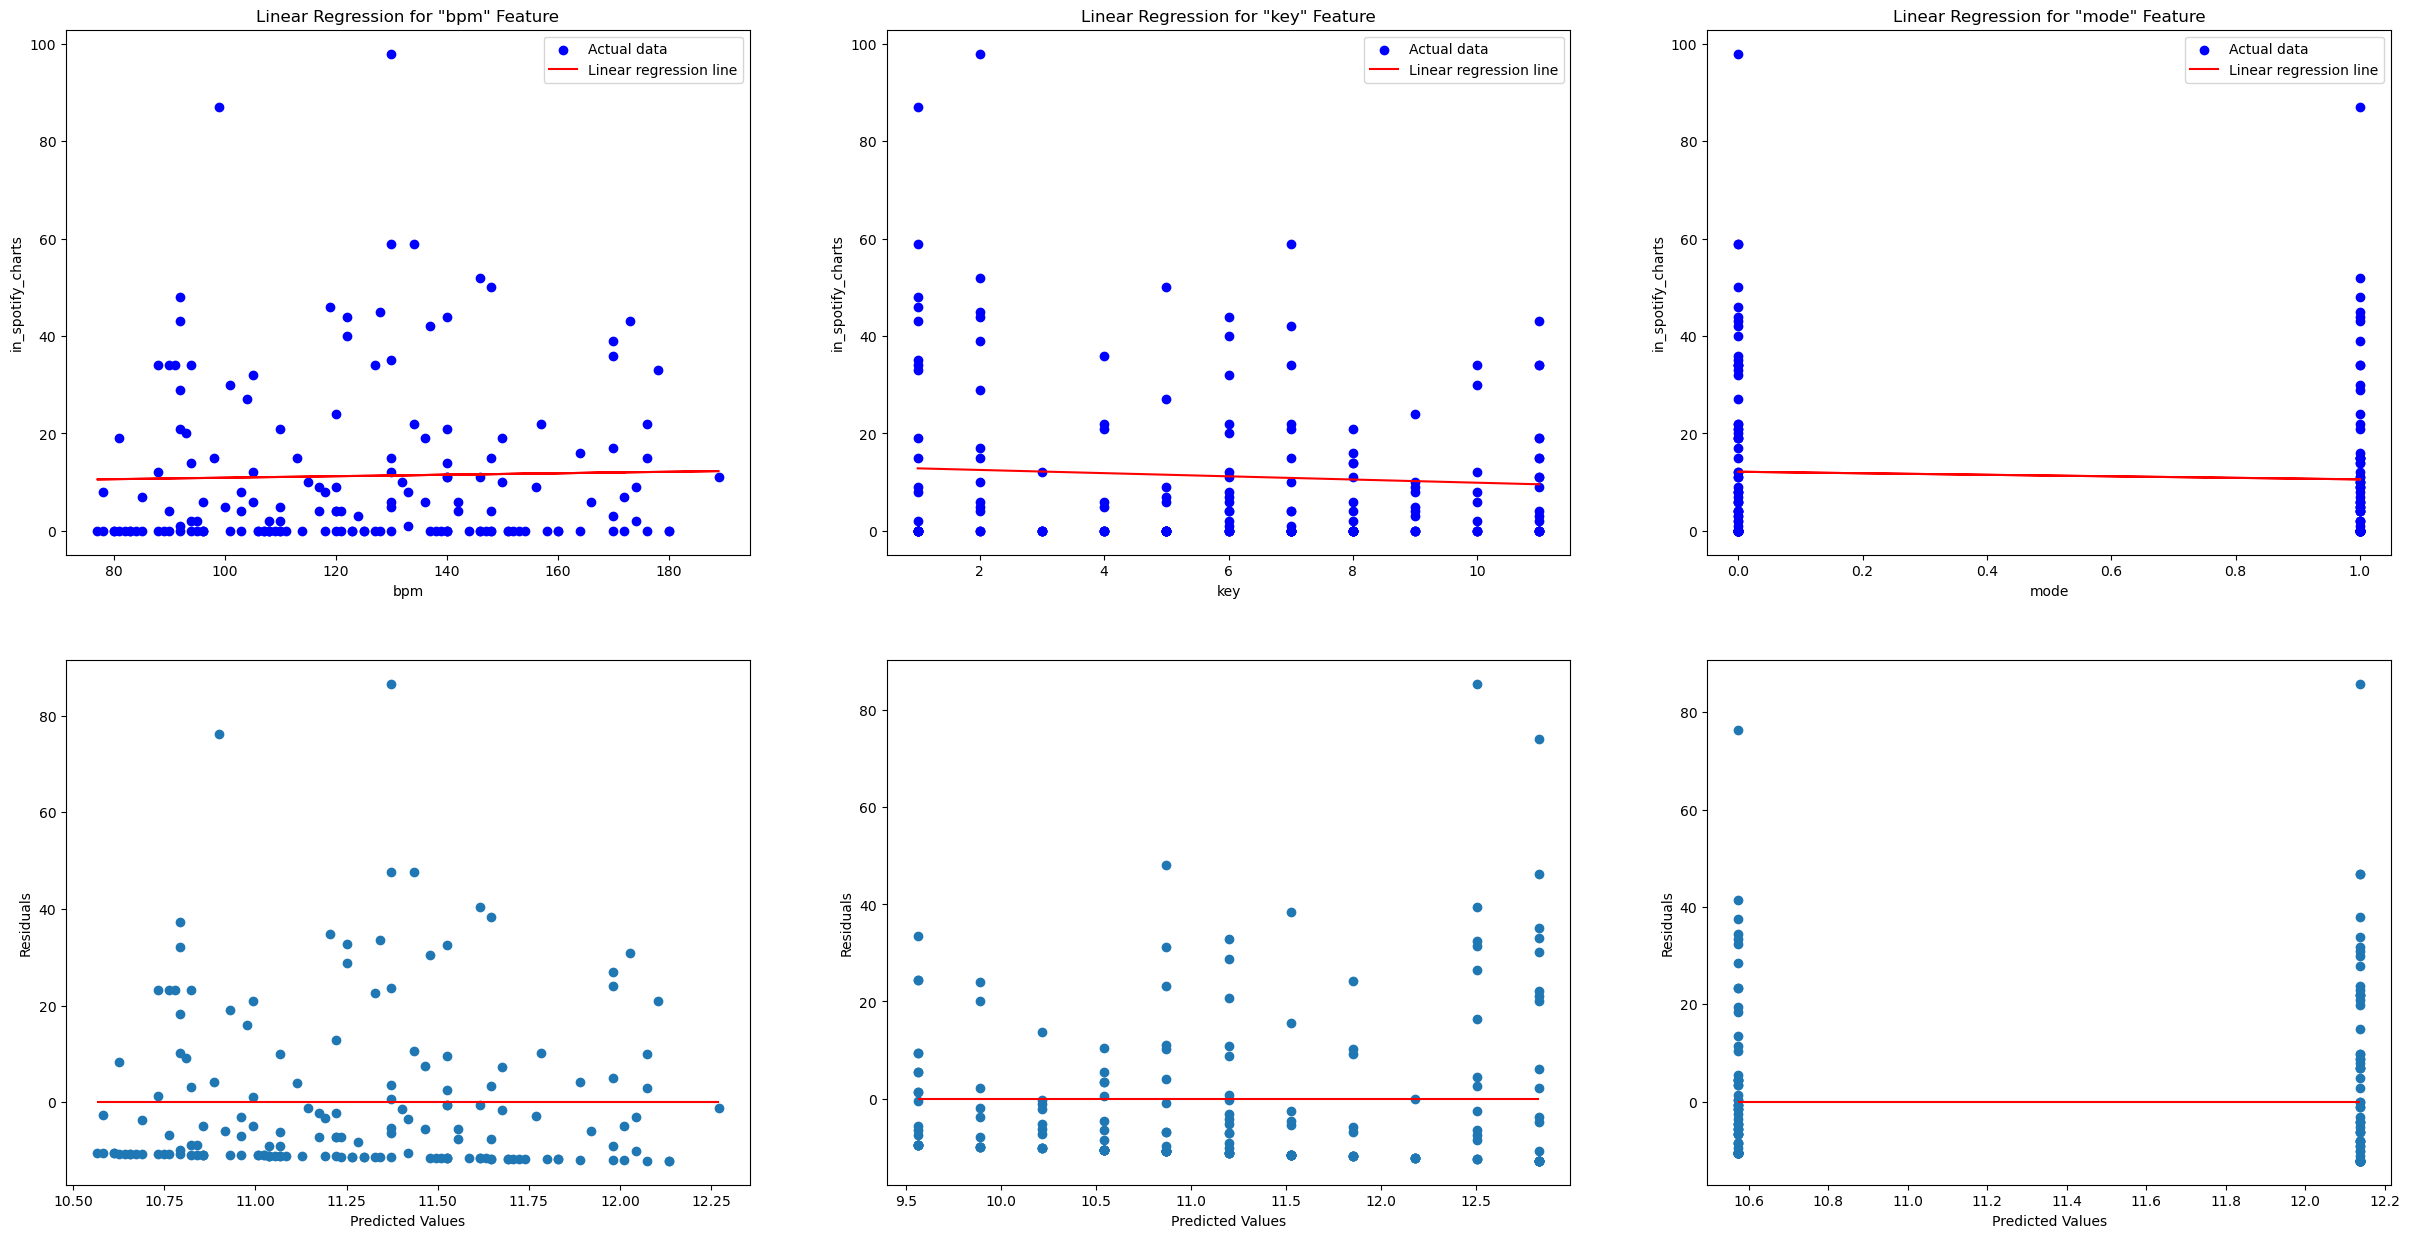

In [371]:
#Plots and Residuals for Key BPm and Mode
fig, axes = plt.subplots(2, 3, figsize=(30, 15 )) 
for i, column in enumerate(features): 
    #Features 
    X_feature = data_100[[column]] 

    #Data Split 
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.2, random_state=13) 

    #Train Linear Regression 
    model_feature = LinearRegression() 
    model_feature.fit(X_train_feature, y_train_feature)  

        # Predict the target variable for the testing data
    y_pred_feature = model_feature.predict(X_test_feature)
    
    # Linear regresion and data plots
    axes[0,i].scatter(X_test_feature, y_test_feature, color='blue', label='Actual data')
    axes[0,i].plot(X_test_feature, y_pred_feature, color='red', label='Linear regression line')
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('in_spotify_charts')
    axes[0,i].set_title(f'Linear Regression for "{column}" Feature')
    axes[0,i].legend() 
    #Residual Plots 
    residuals = y_test_feature - y_pred_feature 
    axes[1,i].scatter(y_pred_feature,residuals) 
    axes[1, i].hlines(y=0, xmin=y_pred_feature.min(), xmax=y_pred_feature.max(), colors='red') 
    axes[1,i].set_xlabel('Predicted Values') 
    axes[1,i].set_ylabel('Residuals')  
    
    #Coeffiecnts 
    coefficient = model.coef_[i] 

    print(f'Coefficient for {column} = ',coefficient) 
    print('==================================================')



Mean of Feature for danceability_%=  67.3968058968059
Mean of Feature for valence_%=  51.146191646191646
Mean of Feature for energy_%=  64.32800982800983
Mean of Feature for acousticness_%=  26.345208845208845
Mean of Feature for instrumentalness_%=  1.683046683046683
Mean of Feature for liveness_%=  18.147420147420146
Mean of Feature for speechiness_%=  10.546683046683047


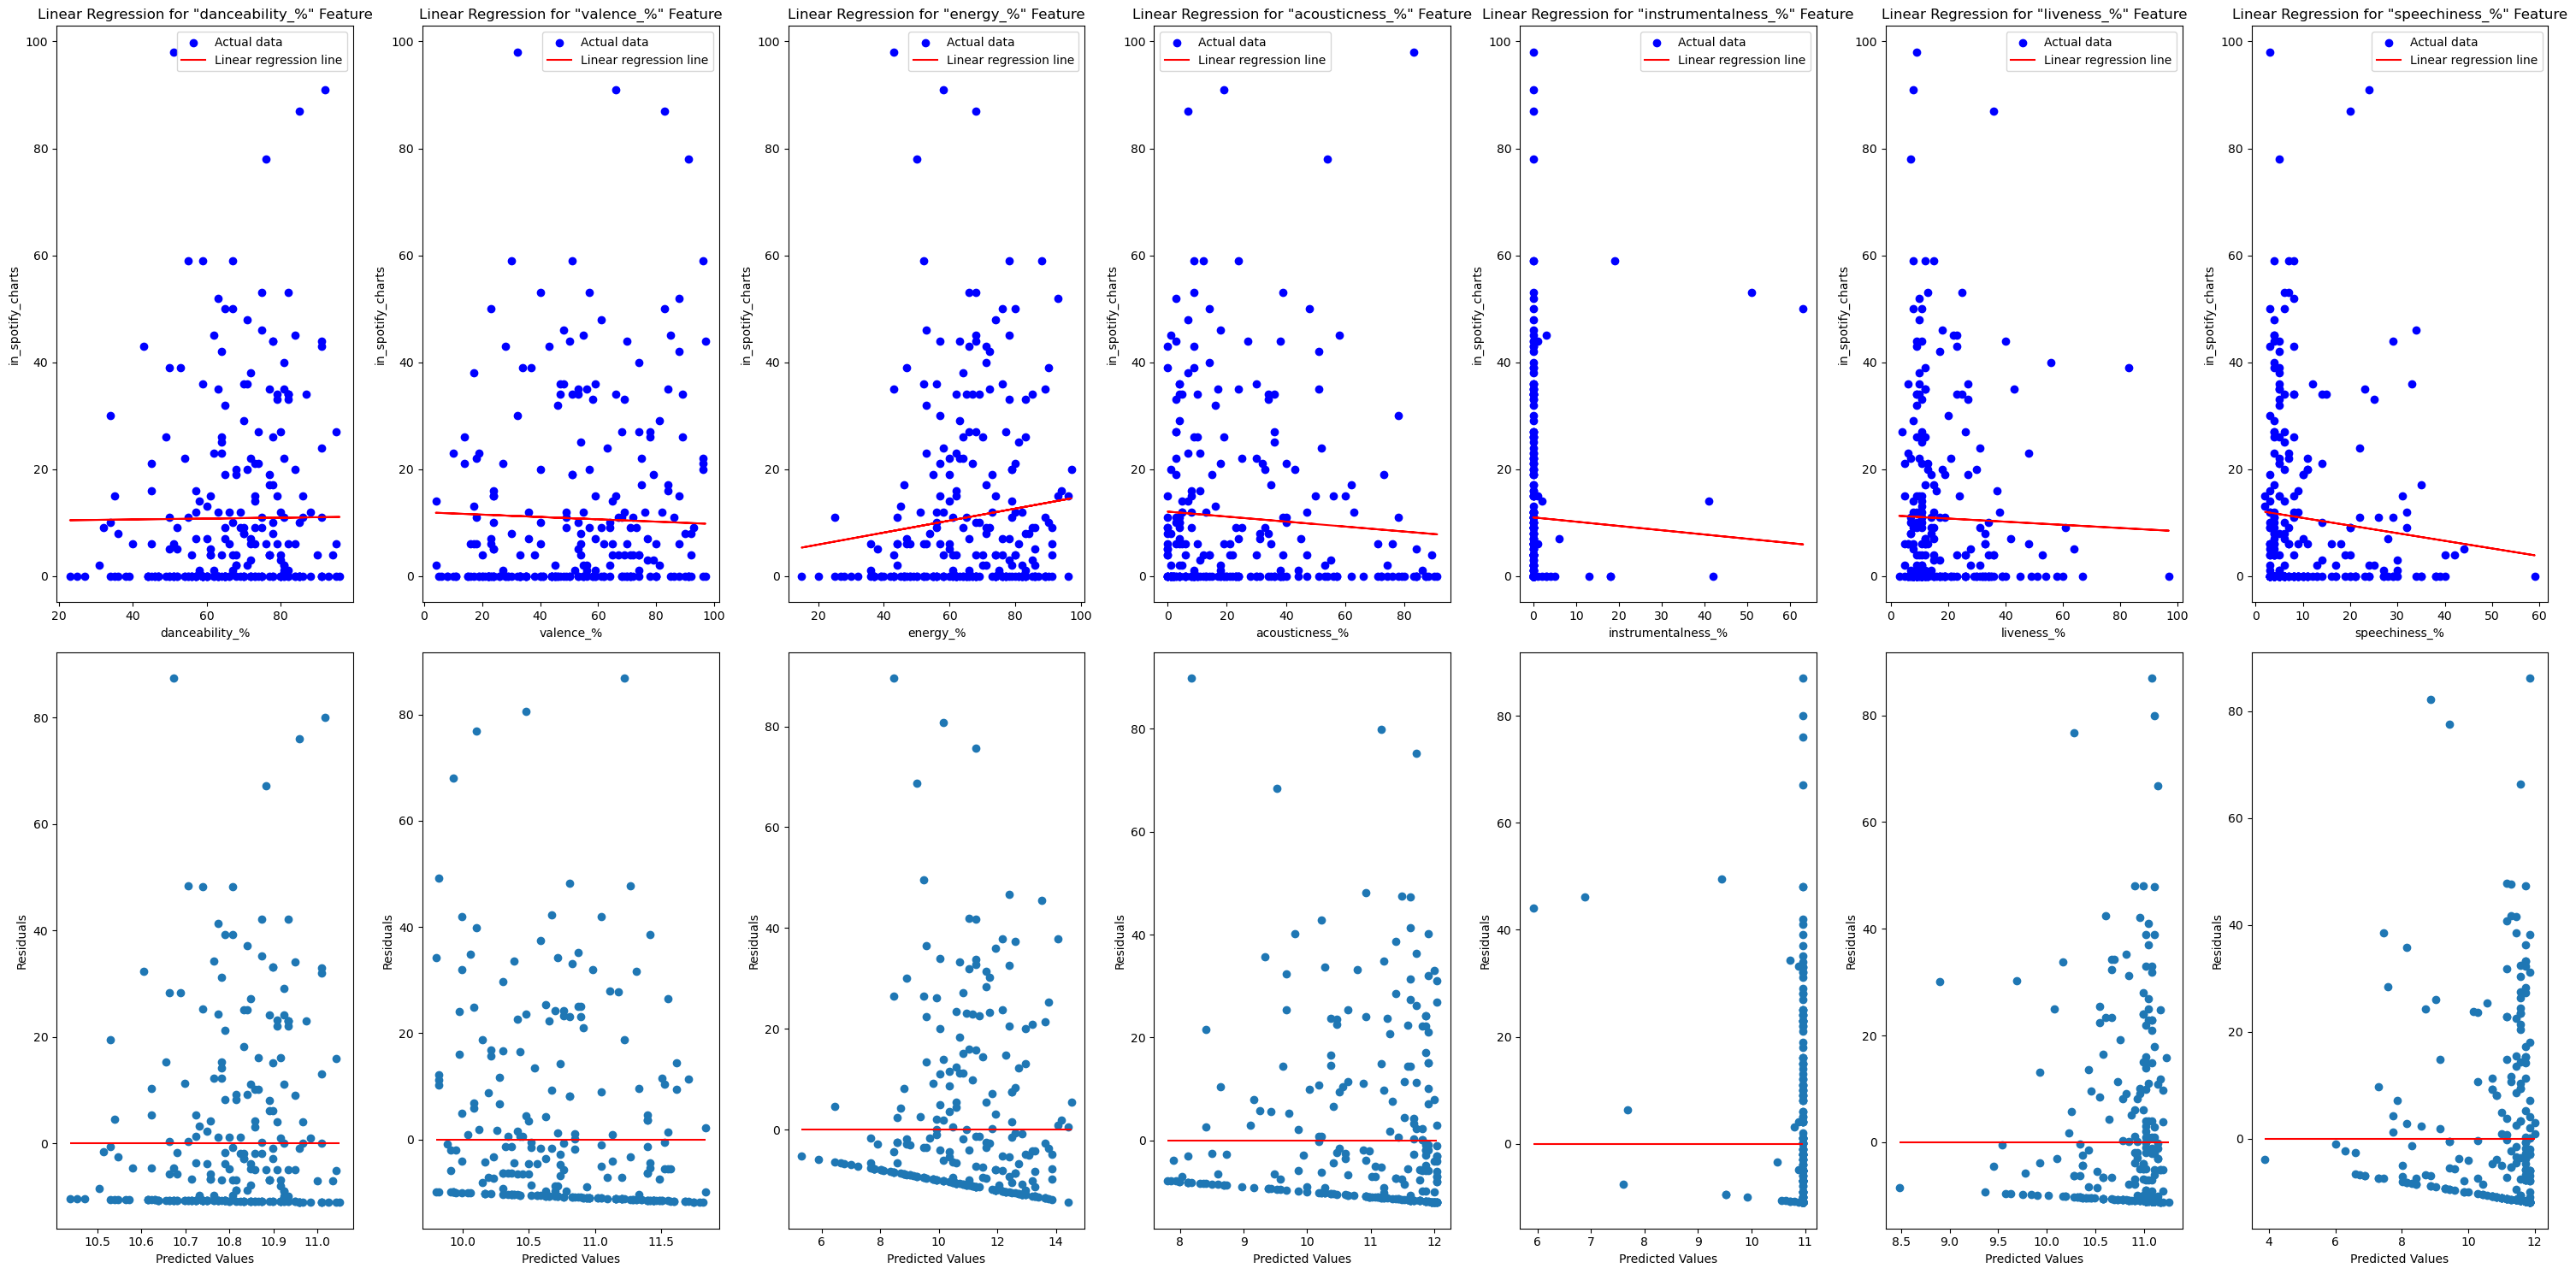

In [389]:
#Plots for Columns 18-24

fig, axes = plt.subplots(2, 7, figsize=(30, 15 ))



# Loop through each column in columns 18 to 24
for i, column in enumerate(features_18_24):
    # Features
    X_feature = data_100[[column]] 
  
    
    # Data Split
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.3, random_state=13)
    
    # Train a linear regression model
    model_feature = LinearRegression()
    model_feature.fit(X_train_feature, y_train_feature) 
    
    
    # Predict the target variable for the testing data
    y_pred_feature = model_feature.predict(X_test_feature)
    
    # Linear regresion and data plots
    axes[0,i].scatter(X_test_feature, y_test_feature, color='blue', label='Actual data')
    axes[0,i].plot(X_test_feature, y_pred_feature, color='red', label='Linear regression line')
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('in_spotify_charts')
    axes[0,i].set_title(f'Linear Regression for "{column}" Feature')
    axes[0,i].legend() 
    #Residual Plots 
    residuals = y_test_feature - y_pred_feature 
    axes[1,i].scatter(y_pred_feature,residuals) 
    axes[1, i].hlines(y=0, xmin=y_pred_feature.min(), xmax=y_pred_feature.max(), colors='red') 
    axes[1,i].set_xlabel('Predicted Values') 
    axes[1,i].set_ylabel('Residuals')  
    
    #Coeffiecnts 
    coefficient = model.coef_[i] 

    

    #Mean of Each Feature 
    mean = np.mean(X_feature) 

    

    print(f'Coefficient for {column} = ',coefficient) 
    print(f'Mean of Feature for {column}= ',mean)
    
    
    print('==================================================') 

    
    

   

   
    

    
# Adjust subplot layout
plt.tight_layout()
plt.show() 




In [ ]:
#Feature Engeeniring
from itertools import combinations 


interactions_data = pd.DataFrame(index = data_100[features_18_24].index)

for (feat_a, feat_b) in combinations(data_100[features_18_24].columns, 2):
    interactions_data[f'{feat_a}_x_{feat_b}'] = data_100[features_18_24][feat_a] * data_100[features_18_24][feat_b]/100

interactions_data.head()

,danceability_%_x_valence_%,danceability_%_x_energy_%,danceability_%_x_acousticness_%,danceability_%_x_instrumentalness_%,danceability_%_x_liveness_%,danceability_%_x_speechiness_%,valence_%_x_energy_%,valence_%_x_acousticness_%,valence_%_x_instrumentalness_%,valence_%_x_liveness_%,...,energy_%_x_acousticness_%,energy_%_x_instrumentalness_%,energy_%_x_liveness_%,energy_%_x_speechiness_%,acousticness_%_x_instrumentalness_%,acousticness_%_x_liveness_%,acousticness_%_x_speechiness_%,instrumentalness_%_x_liveness_%,instrumentalness_%_x_speechiness_%,liveness_%_x_speechiness_%
1,43.31,52.54,4.97,0.00,7.10,2.84,45.14,4.27,0.00,6.10,...,5.18,0.0,7.40,2.96,0.00,0.70,0.28,0.00,0.00,0.40
3,31.90,39.60,6.05,0.00,6.05,8.25,41.76,6.38,0.00,6.38,...,7.92,0.0,7.92,10.80,0.00,1.21,1.65,0.00,0.00,1.65
4,14.95,52.00,9.10,40.95,7.15,3.90,18.40,3.22,14.49,2.53,...,11.20,50.4,8.80,4.80,8.82,1.54,0.84,6.93,3.78,0.66
5,60.72,53.36,17.48,0.00,7.36,22.08,38.28,12.54,0.00,5.28,...,11.02,0.0,4.64,13.92,0.00,1.52,4.56,0.00,0.00,1.92
6,55.61,50.92,32.16,0.00,5.36,2.01,63.08,39.84,0.00,6.64,...,36.48,0.0,6.08,2.28,0.00,3.84,1.44,0.00,0.00,0.24


In [ ]:
#Perfroming Machine Learning algorithms on New features 

